In [2]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Annotated,Literal


In [3]:
class QuadState(TypedDict):
    a:int
    b:int
    c:int
    equation : str
    discrimiant : float
    result : str

In [5]:
graph = StateGraph(QuadState)

In [7]:
def show_equation(state: QuadState):
    equation = f'{state["a"]}x2{state["b"]}x{state["c"]}'
    return {'equation':equation}


def calcualte_discrimant(state: QuadState):
    discrimiant = (state['b']**2 - (4*state['a']*state['c']))
    return {'discrimiant':discrimiant}

In [18]:
def real_roots(state:QuadState):
    root1 = (-state['b'] + state['discrimiant']**0.5)/(2*state['a'])
    root2 = (-state['b'] - state['discrimiant']**0.5)/(2*state['a'])
    result = f'The Roots are {root1} and {root2}'
    return {'result':result}

In [19]:
def reapated_roots(state:QuadState):
    root = (-state['b'])/(2*state['a'])
    result = f'Only Reapting Roots are {root}'
    return {'result':result}

In [20]:
def no_real_roots(state:QuadState):
    result = f'No Real Roots'
    return {'result':result}

In [24]:
def check_condition(state:QuadState) -> Literal['real_roots','reapated_roots','no_real_roots']:
    if state['discrimiant'] > 0 :
        return 'real_roots'
    elif state['discrimiant'] ==0:
        return 'reapated_roots'
    else :
        return 'no_real_roots'
    

In [28]:
if 'show_equation' not in graph.nodes:
    graph.add_node('show_equation',show_equation)

if 'calcualte_discrimant' not in graph.nodes:
    graph.add_node('calcualte_discrimant',calcualte_discrimant)
    
graph.add_node('real_roots',real_roots)

graph.add_node('reapated_roots',reapated_roots)
graph.add_node('no_real_roots',no_real_roots)


graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','calcualte_discrimant')
graph.add_conditional_edges('calcualte_discrimant',check_condition)
graph.add_edge('real_roots',END)
graph.add_edge('reapated_roots',END)
graph.add_edge('no_real_roots',END)
graph.add_edge('calcualte_discrimant',END)




Adding a node to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding a node to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding a node to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that 

In [29]:
workflow =graph.compile()

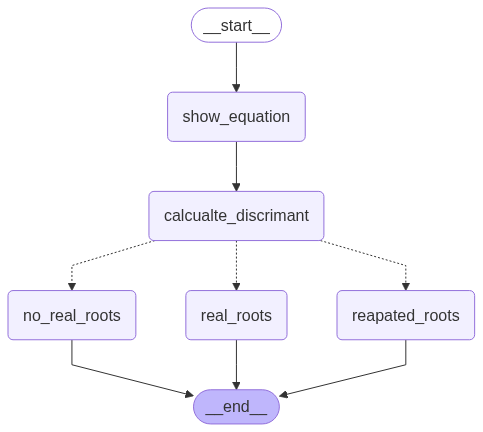

In [30]:
workflow

In [31]:
inital_state = {
    'a' : 4,
    'b' : -5,
    'c' : -4
}

workflow.invoke(inital_state)

{'a': 4,
 'b': -5,
 'c': -4,
 'equation': '4x2-5x-4',
 'discrimiant': 89,
 'result': 'The Roots are 1.8042476415070754 and -0.5542476415070754'}